### <center> ADMISSION DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.shape

(500, 9)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop(['Research','Serial No.'], axis=1,inplace=True)

In [10]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit '],
      dtype='object')

In [11]:
data.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit '},inplace=True)

In [12]:
data.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance_of_Admit '],
      dtype='object')

### EDA

#### Univariate Analysis

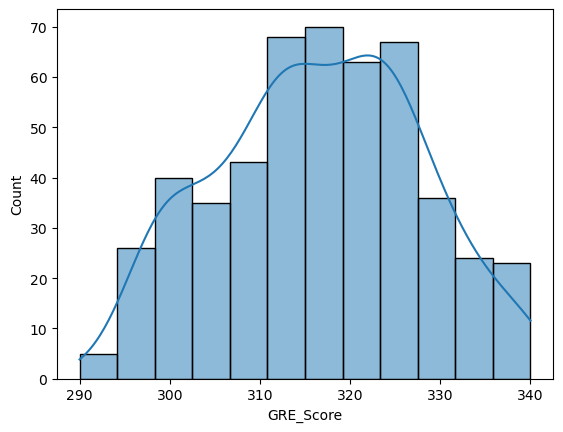

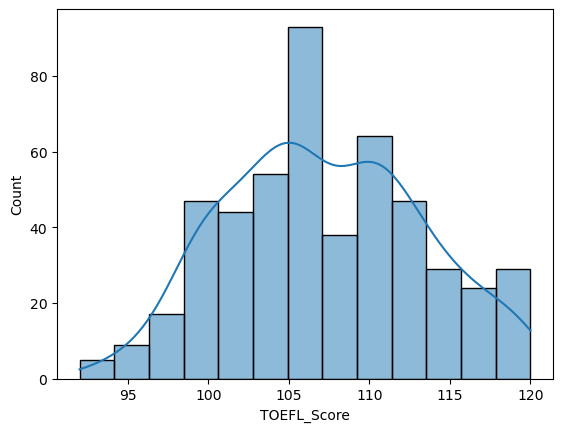

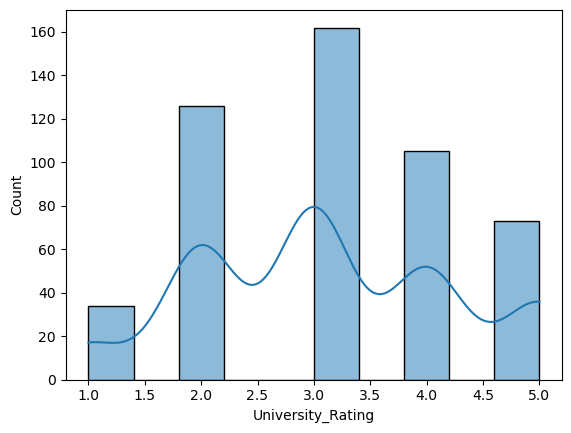

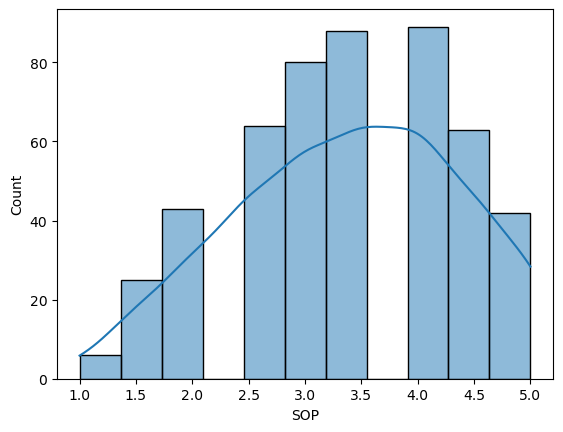

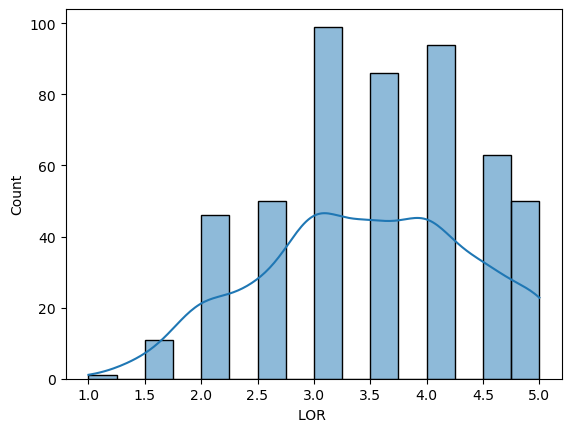

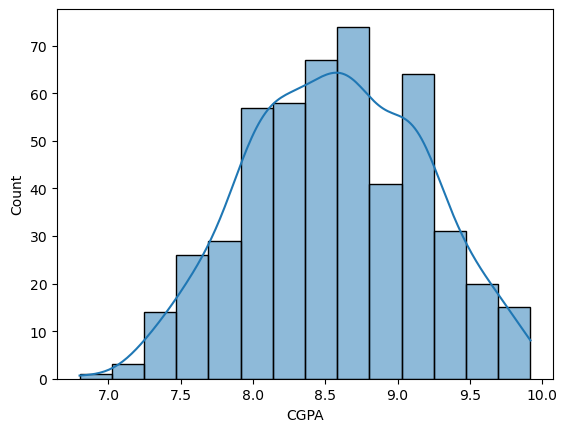

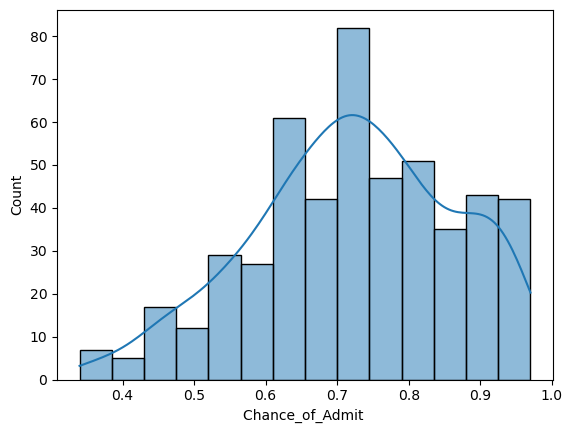

In [13]:
for i in data.columns:
    sns.histplot(x=data[i],kde = True)
    plt.show()

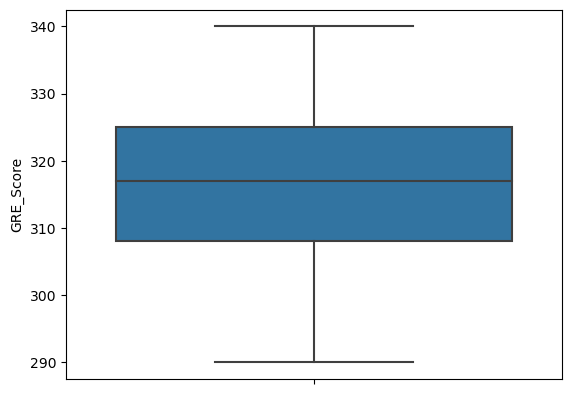

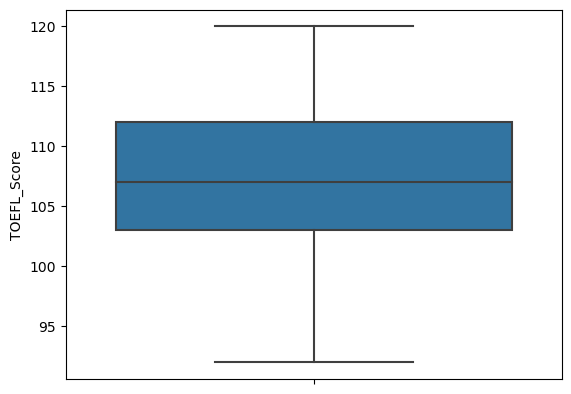

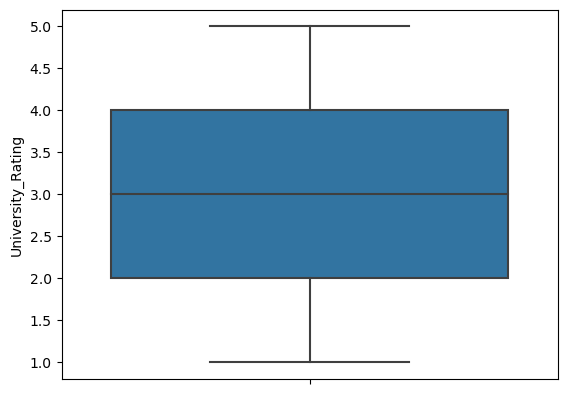

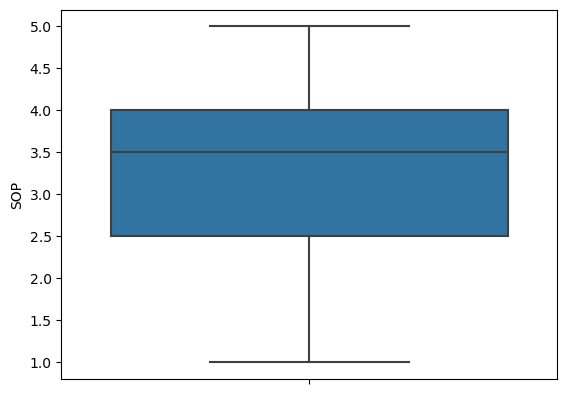

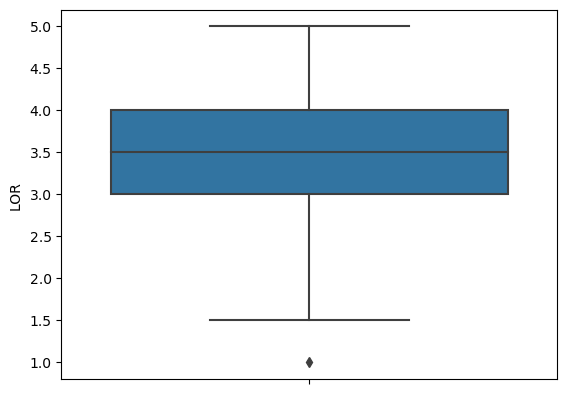

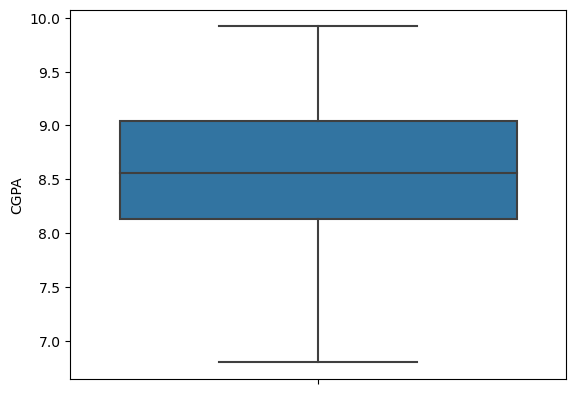

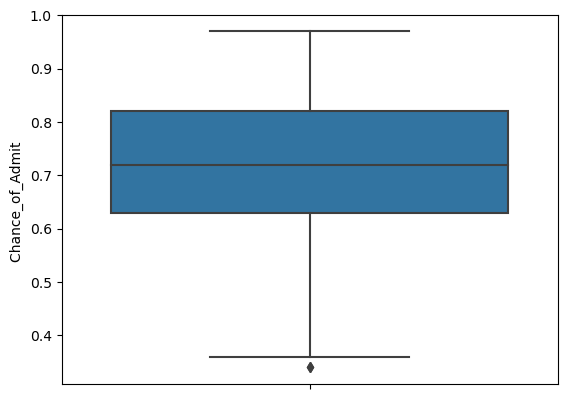

In [14]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

#### Removing outliers

In [15]:
def outlier_limit(col):
    Q1,Q3 = np.nanpercentile(col,[25,75])
    IQR = Q3-Q1
    UL = Q3 +1.5*IQR
    LL = Q1 - 1.5*IQR
    return LL,UL

In [16]:
LL,UL = outlier_limit(data['LOR '])
data['LOR '] = np.where((data['LOR ']>UL)|(data['LOR ']<LL),np.nan,data['LOR '])

In [17]:
LL,UL = outlier_limit(data['Chance_of_Admit '])
data['Chance_of_Admit '] = np.where((data['Chance_of_Admit ']>UL)|(data['Chance_of_Admit ']<LL),np.nan,data['Chance_of_Admit '])

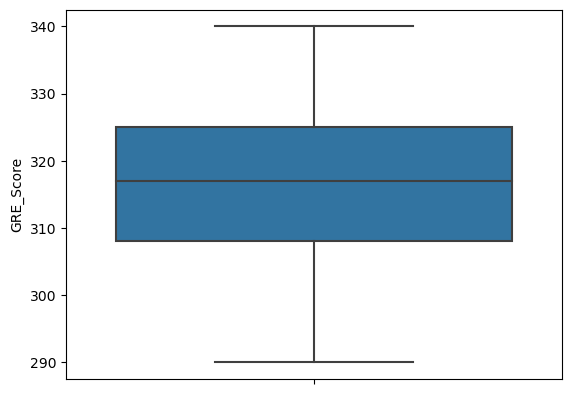

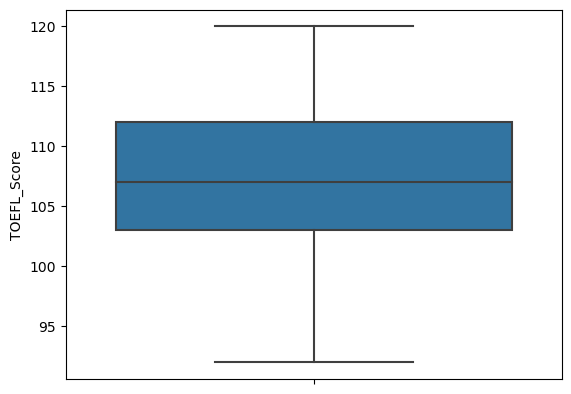

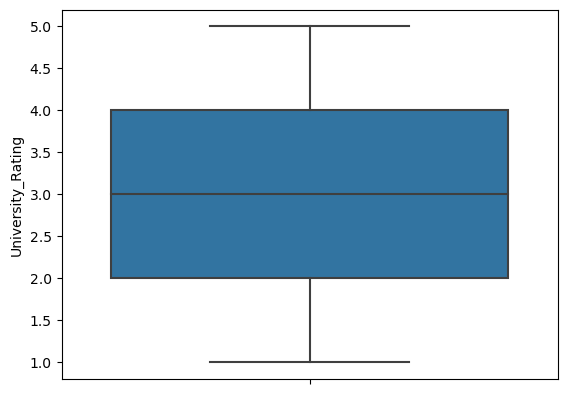

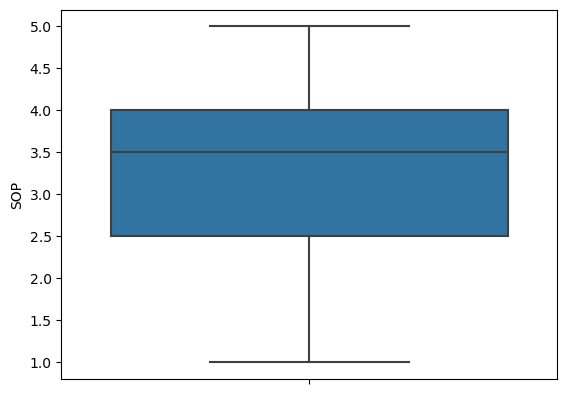

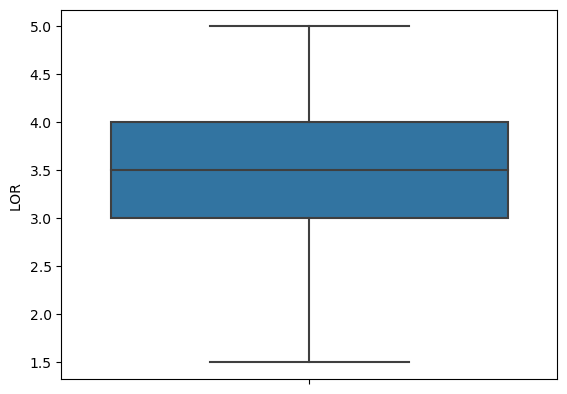

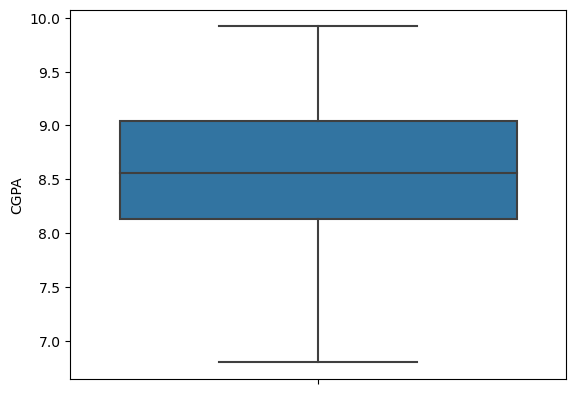

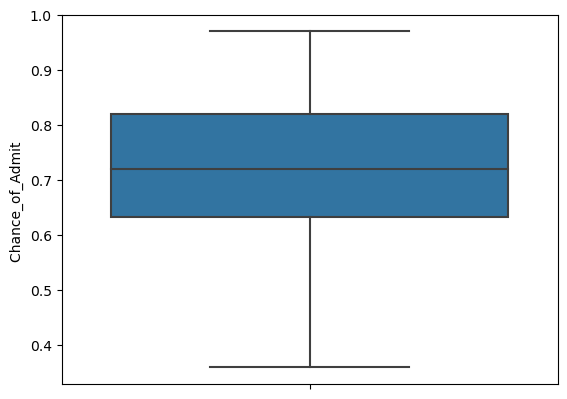

In [18]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

In [19]:
data.dropna(inplace=True)

#### Multivariate Analysis

#### Scatterplot

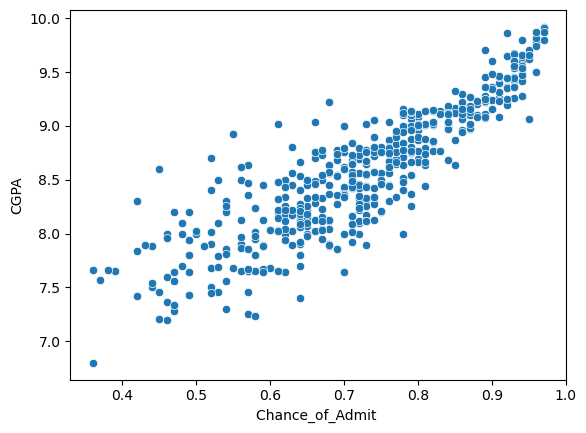

In [20]:
sns.scatterplot(data=data,x='Chance_of_Admit ',y='CGPA')
plt.show()

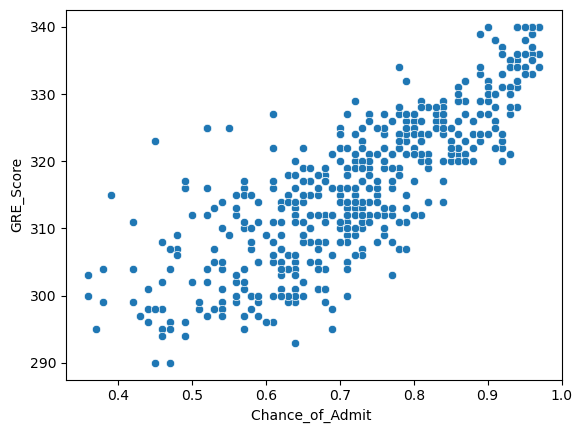

In [21]:
sns.scatterplot(data=data,x='Chance_of_Admit ',y='GRE_Score')
plt.show()

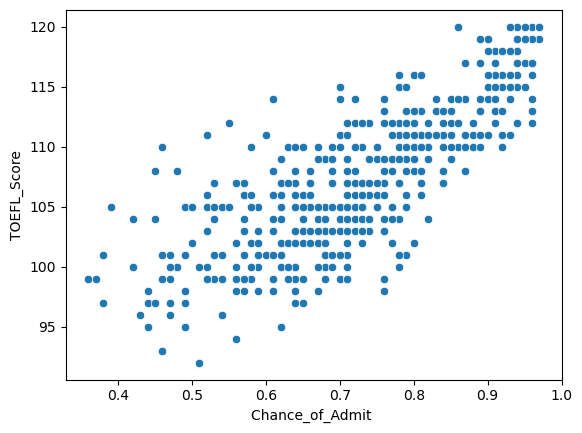

In [22]:
sns.scatterplot(data=data,x='Chance_of_Admit ',y='TOEFL_Score')
plt.show()

#### Heatmap

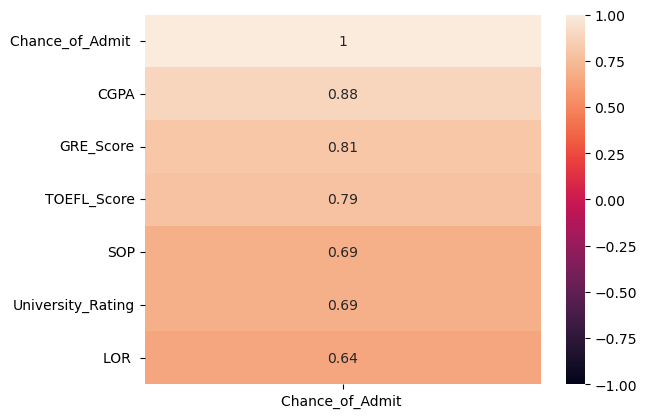

In [23]:
sns.heatmap(data.corr()[['Chance_of_Admit ']].sort_values(by='Chance_of_Admit ',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

In [24]:
data = data[['GRE_Score','TOEFL_Score','CGPA','University_Rating','Chance_of_Admit ']]

#### Selecting features and targets

In [25]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

#### Feature Scaling

#### Splitting the data into training and testing sets

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=46,shuffle=True)

#### Initialising Standard Scaler

In [27]:
sc = StandardScaler()

In [28]:
x_train =sc.fit_transform(x_train)

In [29]:
x_test = sc.transform(x_test)

#### Model Building

In [30]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    'Lasso':Lasso(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

#### Initialising the model

In [31]:
model = LinearRegression()

#### Fittting the model with training data

In [32]:
model.fit(x_train,y_train)

LinearRegression()

#### Predicting using the test data

In [33]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [34]:
r2_score(y_test,y_pred)

0.8550427184123398

#### Testing the accuracy

In [35]:
model.score(x_test,y_test)

0.8550427184123398

#### Training accuracy

In [36]:
model.score(x_train,y_train)

0.8009157779707861

#### MAE

In [37]:
mean_absolute_error(y_test,y_pred)

0.03416464490006874

#### MSE

In [38]:
mean_squared_error(y_test,y_pred)

0.002094163057349345

#### Rootmean squared error

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.04576202636847876

####  Creating a dataframe with y_test and y_pred

In [40]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [41]:
Output.head()

,Actual,Prediction
0,0.79,0.729914
1,0.42,0.509690
2,0.76,0.679948
3,0.65,0.683987
4,0.80,0.782703


#### Plotting the result

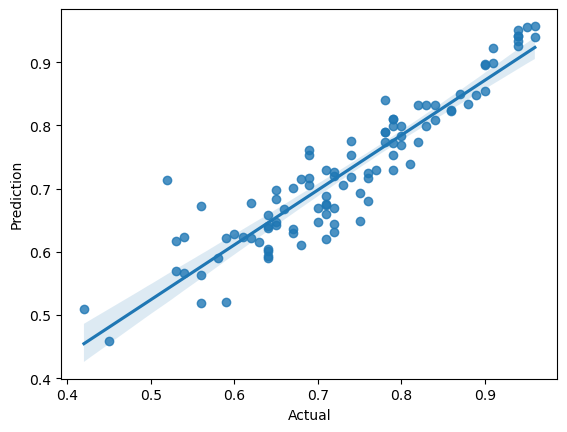

In [42]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()

## <center> OR

#### Using a for loop for model training and testing

In [43]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ",training_score)
    print("testing_score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse_test: ",rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  85.50427184123399
training_score:  80.0915777970786
testing_score:  85.50427184123399
mae:  0.03416464490006874
mse:  0.002094163057349345
rmse_test:  0.04576202636847876
****************************************************************************************************
model trained with Ridge
r2score:  85.49531167749024
training_score:  80.09106515923212
testing_score:  85.49531167749024
mae:  0.03418977499137481
mse:  0.002095457510701011
rmse_test:  0.04577616749686469
****************************************************************************************************
model trained with Lasso
r2score:  -0.6799072993108446
training_score:  0.0
testing_score:  -0.6799072993108446
mae:  0.09707556675062973
mse:  0.014544984575753919
rmse_test:  0.12060258942391709
****************************************************************************************************
model trained with LinearSVR
r2score:  85.37481326368784
training_score:  79

#### Using Randomforestregressor

#### Initialising the model

In [44]:
model = RandomForestRegressor()

#### Fitting the model with training data

In [45]:
model.fit(x_train,y_train)

RandomForestRegressor()

#### Predicting using the test data

In [46]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [47]:
r2_score(y_test,y_pred)

0.794328865753366

#### Testing the accuracy

In [48]:
model.score(x_test,y_test)

0.794328865753366

#### Training accuracy

In [49]:
model.score(x_train,y_train)

0.9649813803091953

#### MAE

In [50]:
mean_absolute_error(y_test,y_pred)

0.04074220000000009

#### MSE

In [51]:
mean_squared_error(y_test,y_pred)

0.0029712815153889005

#### Root Mean Squared Error

In [52]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.05450946262245575

#### Creating a dataframe with y_test and y_pred

In [54]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['actual','prediction'])

In [55]:
Output.head()

,actual,prediction
0,0.79,0.730300
1,0.42,0.476175
2,0.76,0.697300
3,0.65,0.643600
4,0.80,0.795400


#### Plotting the result

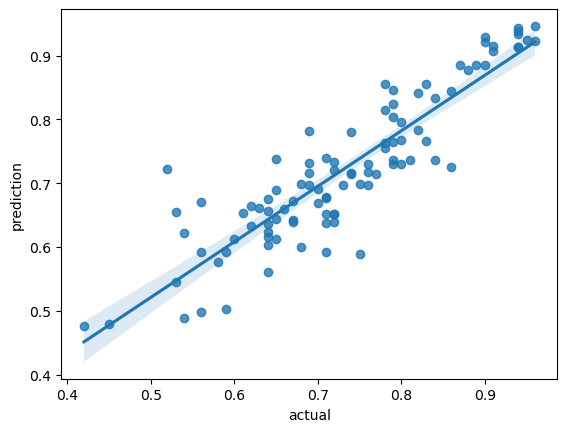

In [56]:
sns.regplot(data=Output,x='actual',y = 'prediction')
plt.show()